In [2]:
from pathlib import Path
import datetime as dt
import geopandas as go
import pandas as pd
import json
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates

In [3]:
datapath = Path().absolute().parents[1] / "data/AICC_lightning"
files = list(datapath.glob("alaska_lightning_*.json"))

In [4]:
result = []
for fp in files:
    with open(fp) as src:
        result.extend([item['attributes'] for item in json.load(src)['features']])

result

[{'OBJECTID': 3451346,
  'STROKETYPE': 'GROUND_STROKE',
  'NETWORKCODE': 0,
  'UTCDATETIME': 1749962424000,
  'LOCALDATETIME': 1749933624000,
  'MILLISECONDS': 967,
  'LATITUDE': 65.5571414,
  'LONGITUDE': -131.5363306,
  'AMPLITUDE': -41800.0,
  'GDOP': 7,
  'ERRSEMIMAJOR': 7,
  'ERRSEMIMINOR': 1,
  'ERRELIPSEANGLE': 53,
  'STRIKETIME': '2025/06/14 11:40',
  'STRIKESEQNUMBER': 18753,
  'POLARITY': 'Negative'},
 {'OBJECTID': 3451347,
  'STROKETYPE': 'GROUND_STROKE',
  'NETWORKCODE': 0,
  'UTCDATETIME': 1749963942000,
  'LOCALDATETIME': 1749935142000,
  'MILLISECONDS': 719,
  'LATITUDE': 62.3666019,
  'LONGITUDE': -146.3590426,
  'AMPLITUDE': -32000.0,
  'GDOP': 1,
  'ERRSEMIMAJOR': 1,
  'ERRSEMIMINOR': 1,
  'ERRELIPSEANGLE': 33,
  'STRIKETIME': '2025/06/14 12:05',
  'STRIKESEQNUMBER': 18754,
  'POLARITY': 'Negative'},
 {'OBJECTID': 3451348,
  'STROKETYPE': 'GROUND_STROKE',
  'NETWORKCODE': 0,
  'UTCDATETIME': 1749973249000,
  'LOCALDATETIME': 1749944449000,
  'MILLISECONDS': 853,
  'LA

In [5]:
strikes = pd.DataFrame.from_records(result)
strikes.drop_duplicates(inplace=True)
strikes['STRIKETIME'] = strikes['STRIKETIME'].astype('datetime64[ns]') 
strikes = strikes.query("STROKETYPE == 'GROUND_STROKE'")  
strikes

,OBJECTID,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY
0,3451346,GROUND_STROKE,0,1749962424000,1749933624000,967,65.557141,-131.536331,-41800.0,7,7,1,53,2025-06-14 11:40:00,18753,Negative
1,3451347,GROUND_STROKE,0,1749963942000,1749935142000,719,62.366602,-146.359043,-32000.0,1,1,1,33,2025-06-14 12:05:00,18754,Negative
2,3451348,GROUND_STROKE,0,1749973249000,1749944449000,853,63.005944,-143.350864,-27100.0,1,2,1,-55,2025-06-14 14:40:00,18755,Negative
3,3451350,GROUND_STROKE,0,1749976876000,1749948076000,525,64.723924,-141.146136,-21500.0,3,4,1,82,2025-06-14 15:41:00,18757,Negative
4,3451351,GROUND_STROKE,0,1749976876000,1749948076000,560,64.703032,-141.094157,-24700.0,4,4,1,83,2025-06-14 15:41:00,18758,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213764,132476,GROUND_STROKE,0,1751558445000,1751529645000,424,63.361869,-153.423712,-31600.0,1,1,1,14,2025-07-02 23:00:00,55406,Negative
213765,132477,GROUND_STROKE,0,1751559034000,1751530234000,224,63.339197,-153.470373,45500.0,1,2,1,42,2025-07-02 23:10:00,55407,Positive
213766,132484,GROUND_STROKE,0,1751563522000,1751534722000,614,63.040006,-144.569225,46700.0,1,1,1,-27,2025-07-03 00:25:00,55414,Positive
213767,132487,GROUND_STROKE,0,1751572685000,1751543885000,324,63.317846,-143.624868,-39400.0,1,1,1,-1,2025-07-03 02:58:00,55417,Negative


In [6]:
dailystrikes = strikes.resample('D', on='STRIKETIME').size()
dailystrikes = pd.DataFrame(dailystrikes).rename(columns={0: 'strikecount'})
# dailystrikes.index = dailystrikes.index.date
dailystrikes

,strikecount
STRIKETIME,
2025-05-19,8
2025-05-20,13
2025-05-21,4
2025-05-22,10
2025-05-23,36
...,...
2025-07-26,82
2025-07-27,1812
2025-07-28,2644


In [7]:
sns.set_theme('paper')
sns.set_style('whitegrid')

[Text(13, 0, '01 Jun 2025'),
 Text(27, 0, '15 Jun 2025'),
 Text(43, 0, '01 Jul 2025'),
 Text(57, 0, '15 Jul 2025')]

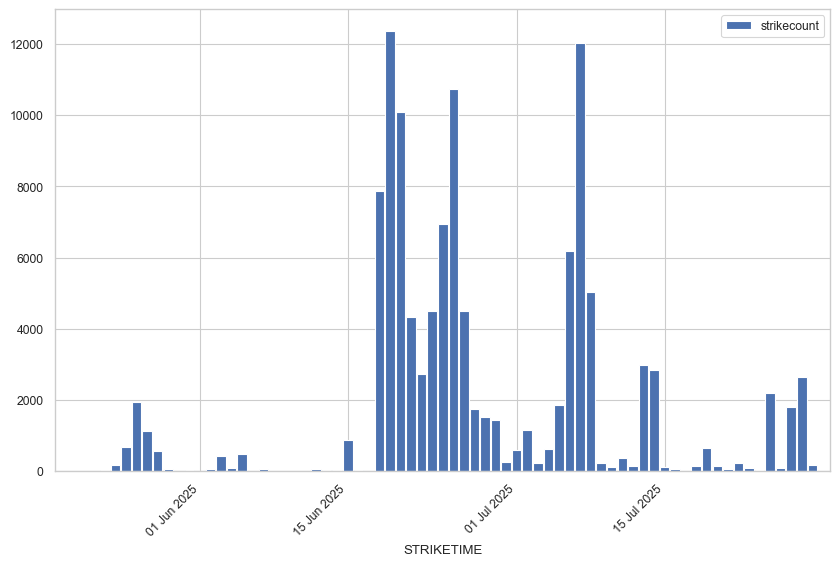

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
dailystrikes.plot.bar(width=.9, ax=ax)
# ax.xaxis.grid(False)
xticks = pd.date_range(start=dailystrikes.index.min(), end=dailystrikes.index.max(), freq='SMS')
ax.set_xticks(xticks.map(lambda d: dailystrikes.index.get_loc(d)))
ax.set_xticklabels(xticks.strftime('%d %b %Y'), rotation=45, ha='right')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

In [9]:
updates = pd.read_csv("/Users/christine/Projects/FiWePs/hnl-fire-data/data/working/all_updates_filtered_withPSA_2025_20250725.csv", parse_dates=['reportdate'])

In [10]:
updatecounts = updates[['reportdate', 'Incident Name']].groupby('reportdate').size()
updatecounts = pd.DataFrame(updatecounts).rename(columns={0: 'updatecount'})
updatecounts ['diffs'] = updatecounts['updatecount'].diff()

In [11]:
mergedDF = pd.merge(updatecounts, dailystrikes, 
                          left_index=True, 
                          right_index=True, 
                     )
mergedDF.reset_index(inplace=True, drop=False, names='reportdate')

In [12]:
mergedDF

,reportdate,updatecount,diffs,strikecount
0,2025-05-19,73,7.0,8
1,2025-05-20,74,1.0,13
2,2025-05-21,76,2.0,4
3,2025-05-22,76,0.0,10
4,2025-05-23,77,1.0,36
...,...,...,...,...
57,2025-07-20,415,1.0,151
58,2025-07-21,415,0.0,49
59,2025-07-22,415,0.0,240
60,2025-07-23,416,1.0,92


Text(0, 0.5, 'Lightning Strikes')

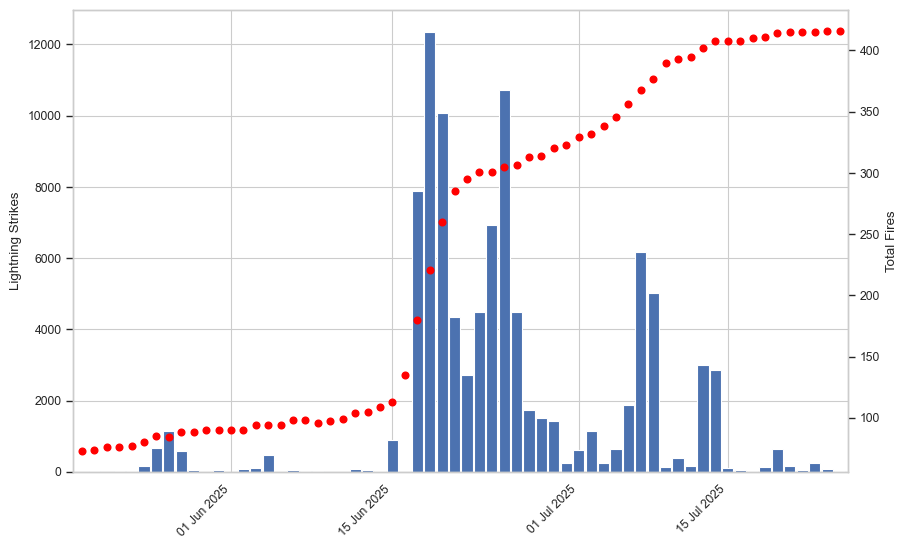

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
mergedDF.strikecount.plot(x='reportdate', ax=ax, label='Lightning Strikes', kind='bar', width=.9)
ax2 = ax.twinx()
# mergedDF.query('diffs > 10')['diffs'].plot(
#     secondary_y='diffs', ax=ax2, color='red', marker='o', linestyle='', label='Update Count Diffs')
mergedDF['updatecount'].plot(
    secondary_y='updatecount', ax=ax2, color='red', marker='o', linestyle='', label='Total fires')
xticks = pd.date_range(start=mergedDF.reportdate.min(), end=mergedDF.reportdate.max(), freq='SMS')
ax.set_xticks(xticks.map(lambda d: mergedDF.set_index('reportdate').index.get_loc(d)))
ax.set_xticklabels(xticks.strftime('%d %b %Y'), rotation=45, ha='right')
# ax2 = ax.twinx()
# mergedDF['diffs'].plot(secondary_y='diffs', ax=ax2, color='red', label='Update Count Diffs')
ax2.xaxis.grid(False)
ax2.yaxis.grid(False)
ax2.set_ylabel('Total Fires')
ax.set_ylabel('Lightning Strikes')
# ax.xaxis.grid(False)
# ax.set_xticks(xticks.map(lambda d: mergedDF.index.get_loc(d)))
# ax.set_xticklabels(xticks.strftime('%d %b %Y'), rotation=45, ha='right')
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %Y'))

In [9]:
strikes

,OBJECTID,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY
0,3451346,GROUND_STROKE,0,1749962424000,1749933624000,967,65.557141,-131.536331,-41800.0,7,7,1,53,2025-06-14 11:40:00,18753,Negative
1,3451347,GROUND_STROKE,0,1749963942000,1749935142000,719,62.366602,-146.359043,-32000.0,1,1,1,33,2025-06-14 12:05:00,18754,Negative
2,3451348,GROUND_STROKE,0,1749973249000,1749944449000,853,63.005944,-143.350864,-27100.0,1,2,1,-55,2025-06-14 14:40:00,18755,Negative
3,3451350,GROUND_STROKE,0,1749976876000,1749948076000,525,64.723924,-141.146136,-21500.0,3,4,1,82,2025-06-14 15:41:00,18757,Negative
4,3451351,GROUND_STROKE,0,1749976876000,1749948076000,560,64.703032,-141.094157,-24700.0,4,4,1,83,2025-06-14 15:41:00,18758,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185004,132476,GROUND_STROKE,0,1751558445000,1751529645000,424,63.361869,-153.423712,-31600.0,1,1,1,14,2025-07-02 23:00:00,55406,Negative
185005,132477,GROUND_STROKE,0,1751559034000,1751530234000,224,63.339197,-153.470373,45500.0,1,2,1,42,2025-07-02 23:10:00,55407,Positive
185006,132484,GROUND_STROKE,0,1751563522000,1751534722000,614,63.040006,-144.569225,46700.0,1,1,1,-27,2025-07-03 00:25:00,55414,Positive
185007,132487,GROUND_STROKE,0,1751572685000,1751543885000,324,63.317846,-143.624868,-39400.0,1,1,1,-1,2025-07-03 02:58:00,55417,Negative


In [10]:
strikes.attrs['title'] = "Ground strikes, 2025, Alaska Lightning Detection Network"
strikes.attrs['creator'] = "Chris Waigl, cwaigl@alaska.edu"
strikes.attrs['contributor'] = "Alaska Interagency Coordination Center (AICC)"
strikes.attrs['source'] = "https://fire.ak.blm.gov/arcgis/rest/services/MapAndFeatureServices/Lightning/FeatureServer"
strikes.attrs['date'] = dt.datetime.now()
strikes.attrs['rights'] = "This data is publicly available from the Bureau of Land Management / Alaska Fire Service. Transformed by the creator of this dataset and made available as open source."


In [11]:
strikes.to_feather(datapath/"GroundStrikes_2025.fth")

In [12]:
reloadstrikes = pd.read_hdf(datapath/"GroundStrikes_2025.h5", key='strikes',)

In [13]:
reloadstrikes.attrs

{}

In [14]:
strikes.to_hdf(datapath/"GroundStrikes_2025.h5", key='strikes', mode='w', format='table')

In [15]:
reloadstrikes

,OBJECTID,STROKETYPE,NETWORKCODE,UTCDATETIME,LOCALDATETIME,MILLISECONDS,LATITUDE,LONGITUDE,AMPLITUDE,GDOP,ERRSEMIMAJOR,ERRSEMIMINOR,ERRELIPSEANGLE,STRIKETIME,STRIKESEQNUMBER,POLARITY
0,3451346,GROUND_STROKE,0,1749962424000,1749933624000,967,65.557141,-131.536331,-41800.0,7,7,1,53,2025-06-14 11:40:00,18753,Negative
1,3451347,GROUND_STROKE,0,1749963942000,1749935142000,719,62.366602,-146.359043,-32000.0,1,1,1,33,2025-06-14 12:05:00,18754,Negative
2,3451348,GROUND_STROKE,0,1749973249000,1749944449000,853,63.005944,-143.350864,-27100.0,1,2,1,-55,2025-06-14 14:40:00,18755,Negative
3,3451350,GROUND_STROKE,0,1749976876000,1749948076000,525,64.723924,-141.146136,-21500.0,3,4,1,82,2025-06-14 15:41:00,18757,Negative
4,3451351,GROUND_STROKE,0,1749976876000,1749948076000,560,64.703032,-141.094157,-24700.0,4,4,1,83,2025-06-14 15:41:00,18758,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100427,128114,GROUND_STROKE,0,1751212247000,1751183447000,741,63.031132,-143.422249,-18800.0,1,2,1,-52,2025-06-28 22:50:00,51526,Negative
100428,128115,GROUND_STROKE,0,1751213988000,1751185188000,777,63.988084,-141.869606,-43400.0,8,9,1,-85,2025-06-28 23:19:00,51527,Negative
100429,128117,GROUND_STROKE,0,1751216306000,1751187506000,80,68.516090,-141.659797,-25200.0,10,11,1,50,2025-06-28 23:58:00,51529,Negative
100430,128118,GROUND_STROKE,0,1751217037000,1751188237000,85,63.284858,-135.234105,-48200.0,4,5,1,52,2025-06-29 00:10:00,51530,Negative
